In [1]:
## conda install -c conda-forge fbprophet 
from fbprophet import Prophet
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

## Import Dataset

In [3]:
fd = sns.load_dataset('flights')
fd.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Subset the dataset

In [4]:
fd = fd.loc[:,['passengers']]
fd.head()

,passengers
0,112
1,118
2,132
3,129
4,121


## Data as a timestamp is needed by the packages

In [5]:
months = pd.date_range('19490101',periods=144,freq='M')
months
fd['ds']= months
fd.head()

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

,passengers,ds
0,112,1949-01-31
1,118,1949-02-28
2,132,1949-03-31
3,129,1949-04-30
4,121,1949-05-31


## Rename the columns as required by the package

In [6]:
fd = fd.rename(columns = {"passengers" : "y"})
fd = fd.sort_index(axis=1)
#fd.y = np.log(fd.y)
fd.head(5)

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


## Build timeseries model

In [7]:
my_forecast = Prophet(interval_width=0.95)

In [8]:
my_forecast.fit(fd)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
forecast_periods = my_forecast.make_future_dataframe(periods=36, include_history=True, freq='M')
forecast_periods

,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
5,1949-06-30
6,1949-07-31
7,1949-08-31
8,1949-09-30
9,1949-10-31


In [10]:
forecast = my_forecast.predict(forecast_periods)
forecast1 = forecast.loc[:,['ds','yhat']]
forecast1.head()

,ds,yhat
0,1949-01-31,84.486659
1,1949-02-28,77.027835
2,1949-03-31,110.637154
3,1949-04-30,108.057708
4,1949-05-31,111.461192


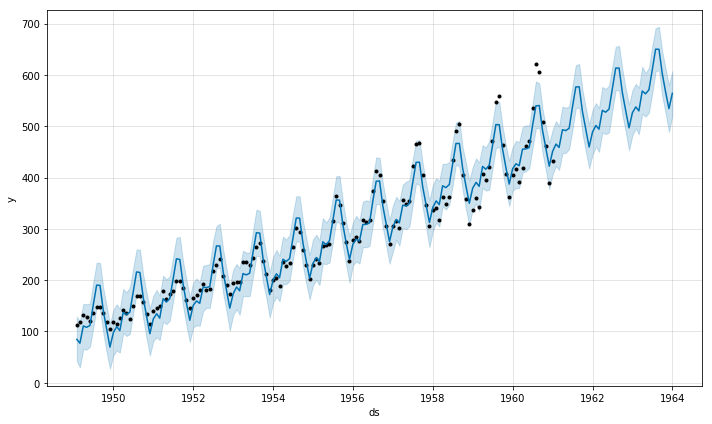

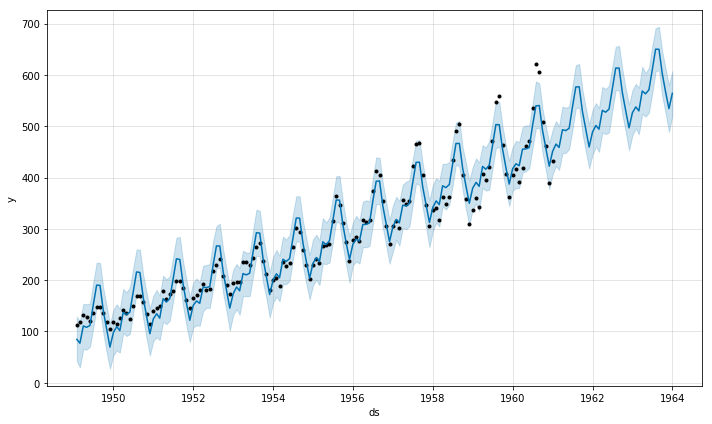

In [11]:
my_forecast.plot(forecast, uncertainty = True)

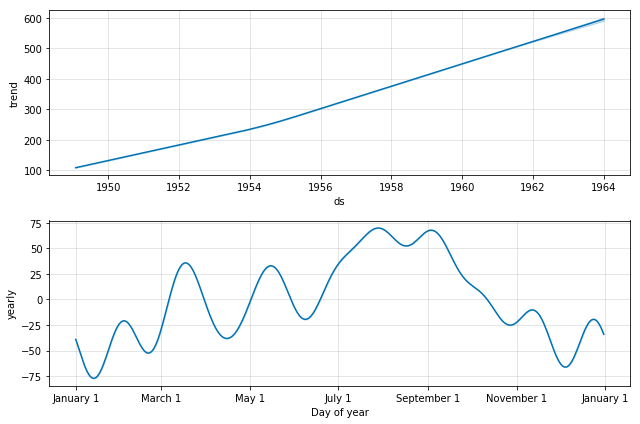

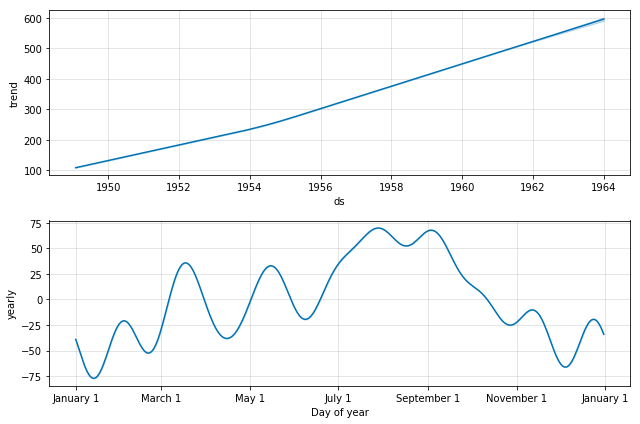

In [12]:
my_forecast.plot_components(forecast)

In [13]:
final_df = pd.merge(forecast1,fd, on ='ds', how='inner')
final_df.head()

,ds,yhat,y
0,1949-01-31,84.486659,112
1,1949-02-28,77.027835,118
2,1949-03-31,110.637154,132
3,1949-04-30,108.057708,129
4,1949-05-31,111.461192,121


# Compute Accuracy of the Forecast

In [14]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df.yhat,final_df.y),0)

17.0

### You can see from the above that on average we are off from the actual numbers by around 17. Let's see if we can improve this by taking log transformation of the 'y'

In [15]:
fd.head()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


## Log tranformation

In [16]:
fd.y = np.log(fd.y)
fd.head(5)

,ds,y
0,1949-01-31,4.718499
1,1949-02-28,4.770685
2,1949-03-31,4.882802
3,1949-04-30,4.859812
4,1949-05-31,4.795791


# Build timeseries model

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
5,1949-06-30
6,1949-07-31
7,1949-08-31
8,1949-09-30
9,1949-10-31


,ds,yhat
0,1949-01-31,4.711608
1,1949-02-28,4.710102
2,1949-03-31,4.835053
3,1949-04-30,4.816537
4,1949-05-31,4.815471


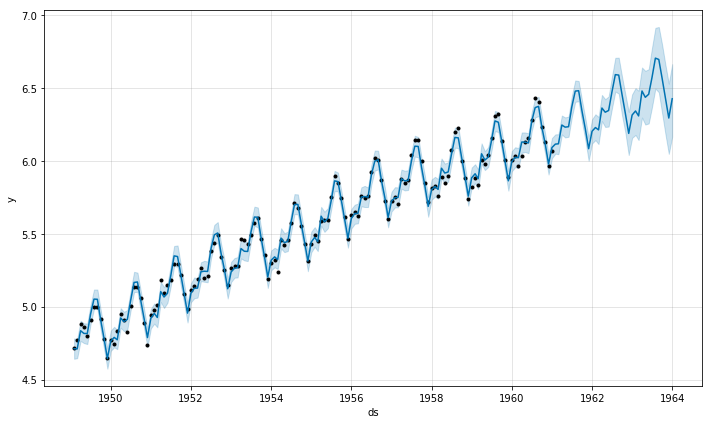

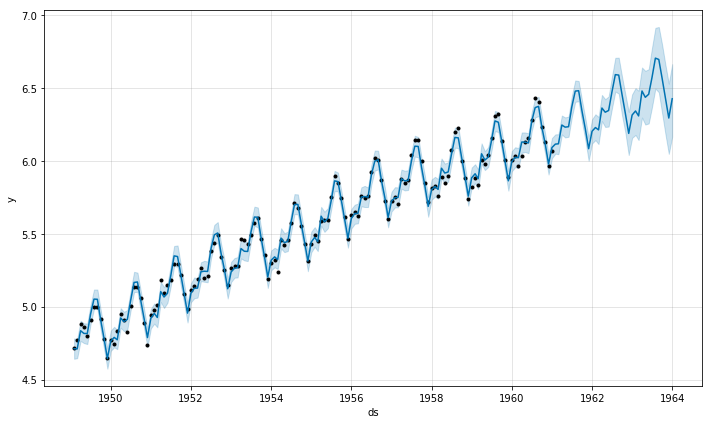

In [17]:
my_forecast = Prophet(interval_width=0.95)
my_forecast.fit(fd)
forecast_periods = my_forecast.make_future_dataframe(periods=36, include_history =True, freq='M')
forecast_periods
forecast = my_forecast.predict(forecast_periods)
forecast1 = forecast.loc[:,['ds','yhat']]
forecast1.head()
my_forecast.plot(forecast, uncertainty = True)

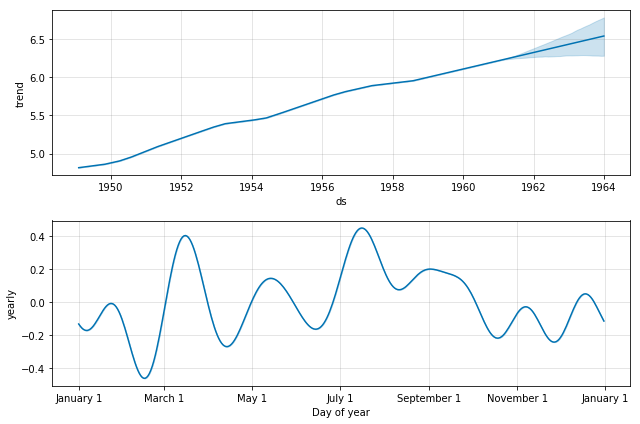

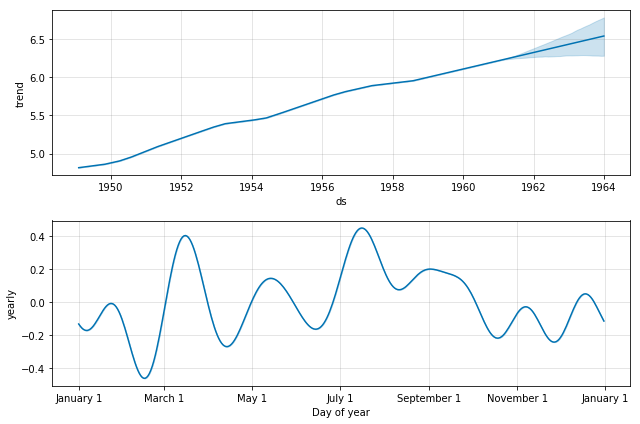

In [18]:
my_forecast.plot_components(forecast)

In [19]:
final_df1 = pd.merge(forecast1,fd, on ='ds', how='inner')
final_df1.head()

,ds,yhat,y
0,1949-01-31,4.711608,4.718499
1,1949-02-28,4.710102,4.770685
2,1949-03-31,4.835053,4.882802
3,1949-04-30,4.816537,4.859812
4,1949-05-31,4.815471,4.795791


# Convert 'y' back to original scale

In [20]:
final_df1.yhat = np.e**(final_df1.yhat)
final_df1.y =np.e**(final_df1.y)
final_df1.head()

,ds,yhat,y
0,1949-01-31,111.230877,112.0
1,1949-02-28,111.063530,118.0
2,1949-03-31,125.845297,132.0
3,1949-04-30,123.536578,129.0
4,1949-05-31,123.404904,121.0


# Compute Accuracy of the Forecast

In [21]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df1.yhat,final_df1.y),0)

7.0

### You can see the converting the vasriable to log scale to make variance more stable in the original data helped signigicantly in imporving the forecast accuracy

In [22]:
final_df1.head()

,ds,yhat,y
0,1949-01-31,111.230877,112.0
1,1949-02-28,111.063530,118.0
2,1949-03-31,125.845297,132.0
3,1949-04-30,123.536578,129.0
4,1949-05-31,123.404904,121.0


In [23]:
final_df1.tail()

,ds,yhat,y
139,1960-08-31,587.381143,606.0
140,1960-09-30,509.617791,508.0
141,1960-10-31,453.021391,461.0
142,1960-11-30,395.312630,390.0
143,1960-12-31,442.748617,432.0


### Generate forecast values for the next 36 months along with the 95% confidence interval

In [24]:
forecast2 = forecast.loc[144:,['ds','yhat','yhat_lower','yhat_upper']]
forecast2.yhat = np.e**(forecast2.yhat)
forecast2.yhat_lower = np.e**(forecast2.yhat_lower)
forecast2.yhat_upper = np.e**(forecast2.yhat_upper)
np.round(forecast2,0)

,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,453.0,424.0,485.0
145,1961-02-28,454.0,423.0,485.0
146,1961-03-31,517.0,484.0,551.0
147,1961-04-30,509.0,474.0,544.0
148,1961-05-31,511.0,477.0,547.0
149,1961-06-30,586.0,546.0,631.0
150,1961-07-31,652.0,606.0,702.0
151,1961-08-31,654.0,609.0,699.0
152,1961-09-30,570.0,529.0,614.0
153,1961-10-31,503.0,466.0,541.0


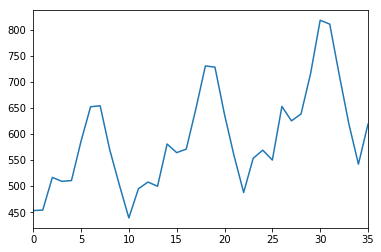

In [25]:
sns.tsplot(forecast2.yhat)
plt.show()